In [1]:
# Install Libraries
!pip install tweepy
!pip install squarify 
!pip install vaderSentiment
!pip install wordcloud


zsh:1: command not found: pip


In [1]:
# Import Libraries

import pandas as pd 
import datetime as dt 
#from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab

import numpy as np      # For number computing
from wordcloud import WordCloud, STOPWORDS 
import re
import tweepy
from datetime import datetime
import itertools
import collections
import logging
import os
from dateutil.relativedelta import relativedelta
import squarify    

In [2]:
consumer_key="  ADD YOUR KEY "
consumer_secret="   ADD YOUR SECRET    "

In [3]:
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
last_year = (dt.datetime.now() - dt.timedelta(weeks=52)).strftime('%Y-%m-%d')

In [7]:
entry1 = input("1st item to compare: ")

1st item to compare: sweet home


In [8]:
entry2 = input("2nd item to compare: ")

2nd item to compare: crash landing on you


In [9]:
# 1000 tweets for 1 year
tweets1 = tweepy.Cursor(api.search, q=entry1 + " -filter:retweets",lang="en",since=last_year).items(1000)

In [10]:
# dataframe
df_tweets1 = pd.DataFrame(data=[(tweet.text,tweet.user.location) for tweet in tweets1], columns=['Tweets','UserLocation'])
df_tweets1.head(10)

,Tweets,UserLocation
0,@euphoric_ggk Sweet home,ela/dela
1,vou assistir sweet home,𝘱𝘢𝘳𝘢𝘥𝘪𝘴 𝘪𝘴𝘭𝘢𝘯𝘥
2,EL WEBTOOM DE SWEET HOME ME ENCANTAAAA @BTS_tw...,Ecuador⠀┊
3,Home Sweet Home https://t.co/eMzj174B1P,"Jakarta, Indonesia"
4,I heard joon is proud of himself for doing 20 ...,RKIVE
5,@adzheem2908 @irdinatahirah @qayyimhijazi alic...,
6,preciso terminar sweet home e wok of love,★ lê o carrd antes de seguir !
7,@s1313r @orphlex_ Home Sweet Home,Chez moi
8,@baekhyuneedolll Sweet home ;; The Uncanny Cou...,¦ ESP/ ENG ¦ 🖇️; ライオン #아르헨티나
9,i just had a dream abt me being in sweet home🚶‍♀️,


In [11]:
# giving up on user location as free form text and not many seem to have correct info

In [12]:
analyzer1 = SentimentIntensityAnalyzer()

In [13]:
sentiment1 = df_tweets1['Tweets'].apply(lambda x: analyzer1.polarity_scores(x))

In [14]:
df_tweets1 = pd.concat([df_tweets1, sentiment1.apply(pd.Series)],1)

In [15]:
df_tweets1.describe()

,neg,neu,pos,compound
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.041682,0.623138,0.335173,0.506953
std,0.087459,0.161403,0.168105,0.351944
min,0.000000,0.109000,0.000000,-0.962300
25%,0.000000,0.500000,0.214000,0.458800
50%,0.000000,0.625000,0.324000,0.484700
75%,0.000000,0.737250,0.448250,0.777325
max,0.565000,1.000000,0.828000,0.992800


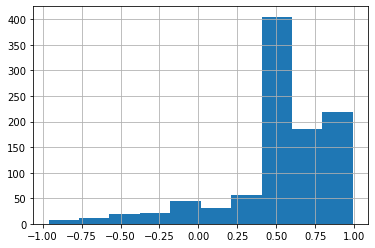

In [16]:
df_tweets1['compound'].hist()

In [17]:
#Cleaning Text (RT, Punctuation etc)
df_tweets1['text'] = df_tweets1['Tweets']
df_tweets1 = df_tweets1[['Tweets','text','UserLocation','neg','neu','pos','compound']]

remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
df_tweets1["text"] = df_tweets1.text.map(remove_rt).map(rt)
df_tweets1["text"] = df_tweets1.text.str.lower()
df_tweets1.head(10)

,Tweets,text,UserLocation,neg,neu,pos,compound
0,@euphoric_ggk Sweet home,ggk sweet home,ela/dela,0.0,0.400,0.600,0.4588
1,vou assistir sweet home,vou assistir sweet home,𝘱𝘢𝘳𝘢𝘥𝘪𝘴 𝘪𝘴𝘭𝘢𝘯𝘥,0.0,0.500,0.500,0.4588
2,EL WEBTOOM DE SWEET HOME ME ENCANTAAAA @BTS_tw...,el webtoom de sweet home me encantaaaa twt n...,Ecuador⠀┊,0.0,0.763,0.237,0.5766
3,Home Sweet Home https://t.co/eMzj174B1P,home sweet home,"Jakarta, Indonesia",0.0,0.500,0.500,0.4588
4,I heard joon is proud of himself for doing 20 ...,i heard joon is proud of himself for doing 20 ...,RKIVE,0.0,0.662,0.338,0.9147
5,@adzheem2908 @irdinatahirah @qayyimhijazi alic...,alice on borderland is really good and ...,,0.0,0.660,0.340,0.7346
6,preciso terminar sweet home e wok of love,preciso terminar sweet home e wok of love,★ lê o carrd antes de seguir !,0.0,0.455,0.545,0.8020
7,@s1313r @orphlex_ Home Sweet Home,home sweet home,Chez moi,0.0,0.571,0.429,0.4588
8,@baekhyuneedolll Sweet home ;; The Uncanny Cou...,sweet home the uncanny counter you shou...,¦ ESP/ ENG ¦ 🖇️; ライオン #아르헨티나,0.0,0.812,0.188,0.4588
9,i just had a dream abt me being in sweet home🚶‍♀️,i just had a dream abt me being in sweet home,,0.0,0.722,0.278,0.6124


In [18]:
# Positive sentiment: compound score >= 0.05
# Neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# Negative sentiment: compound score <= -0.05
pd.set_option('display.max_colwidth', None)

df_pos = df_tweets1.loc[df_tweets1['compound'] >= 0.05,'Tweets']
df_neu = df_tweets1.loc[(df_tweets1['compound'] > -0.05) & (df_tweets1['compound'] < 0.05),'Tweets']
df_neg = df_tweets1.loc[df_tweets1['compound'] <= -0.05,'Tweets']

In [19]:
labels = ['Negative','Neutral','Positive']
sizes = [len(df_neg),len(df_neu),len(df_pos)]

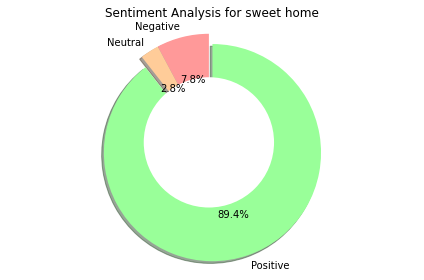

In [20]:
# pie chart
# only "explode" the 3rd slice i.e. 'Positive'
explode = (0, 0, 0.1)  
colors = ['#ff9999','#ffcc99','#99ff99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode,labels=labels, colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90)

#draw center circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
ax1.set_title("Sentiment Analysis for " + entry1)

plt.tight_layout()
plt.savefig(entry1 + ".png",bbox_inces='tight')
plt.show()


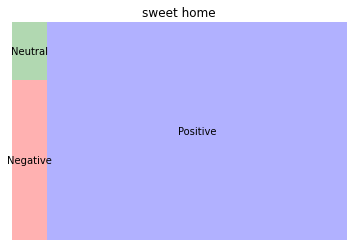

In [21]:
# squarify treemaps
squarify.plot(sizes=sizes, label=labels, color=["red","green","blue"],alpha=.3 )
plt.axis('off')
plt.title(entry1)
plt.savefig(entry1 + "_tree.png",bbox_inces='tight')
plt.show()

In [22]:
tweets2 = tweepy.Cursor(api.search, q=entry2 + " -filter:retweets",lang="en",since=last_year).items(1000)

In [23]:
df_tweets2 = pd.DataFrame(data=[(tweet.text,tweet.user.location) for tweet in tweets2], columns=['Tweets','UserLocation'])

df_tweets2.head(10)

,Tweets,UserLocation
0,Crash landing on you episode 12 https://t.co/xrdbpFbvcw,20.With pansexuals🏳️‍🌈black
1,12. last show i watched was crash landing on you 100000000000/10 would recommend !! also the tgcf donghua!!!! 10000… https://t.co/QlpciDlbYS,she/her • 22
2,crash landing on you is hurting my feelings,hannie's heart ♡
3,@fatimafarha_ Not me crying every time I listen to Crash landing on You's OST. \nMy first ever Kdrama😭😭,Pakistan
4,@sunshinevlg crash landing on you \nhello my twenties \ndo do sol sol la la sol\nprivate lives \nwhen the camellia bloo… https://t.co/ERB5ttpep4,Blue and Grey
5,"""You fail to achieve 100% of the goals you do not set,"" says @HHSGov @SecAzar. What does that mean, Alex? Some ge… https://t.co/O324KHqYKY",
6,"@eitasaio K2, itaweon class, crash landing on you, it’s okay not to be okay, Chicago typewriter.... nossa tem vário… https://t.co/CHDC0LjBaM","Rio do Oeste - SC, Brasil"
7,"@jksbananamillk crash landing on you, itaewon class and my holo love",she/her
8,"@bangtenor i have it exactly the same... sksjs yeah true beauty has really the best cast 🥰.... yess definitely, it… https://t.co/rgZmwRfD5e",she/her | 17
9,"@jksbananamillk It's okay not to be okay, crash landing on you, weightlifting fairy Kim bok jo, love alarm, two worlds apart, start up",Louis' collerbones


In [24]:
analyzer = SentimentIntensityAnalyzer()

In [25]:
sentiment2 = df_tweets2['Tweets'].apply(lambda x: analyzer.polarity_scores(x))

In [26]:
df_tweets2 = pd.concat([df_tweets2, sentiment2.apply(pd.Series)],1)

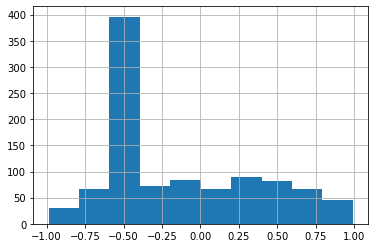

In [27]:
df_tweets2['compound'].hist()

In [28]:
#Cleaning Text (RT, Punctuation etc)
df_tweets2['text'] = df_tweets2['Tweets']
df_tweets2 = df_tweets2[['Tweets','text','UserLocation','neg','neu','pos','compound']]

remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
df_tweets2["text"] = df_tweets2.text.map(remove_rt).map(rt)
df_tweets2["text"] = df_tweets2.text.str.lower()
df_tweets2.head(10)

,Tweets,text,UserLocation,neg,neu,pos,compound
0,Crash landing on you episode 12 https://t.co/xrdbpFbvcw,crash landing on you episode 12,20.With pansexuals🏳️‍🌈black,0.310,0.690,0.000,-0.4019
1,12. last show i watched was crash landing on you 100000000000/10 would recommend !! also the tgcf donghua!!!! 10000… https://t.co/QlpciDlbYS,12 last show i watched was crash landing on you 100000000000 10 would recommend also the tgcf donghua 10000,she/her • 22,0.159,0.739,0.103,-0.3331
2,crash landing on you is hurting my feelings,crash landing on you is hurting my feelings,hannie's heart ♡,0.474,0.526,0.000,-0.6597
3,@fatimafarha_ Not me crying every time I listen to Crash landing on You's OST. \nMy first ever Kdrama😭😭,not me crying every time i listen to crash landing on you s ost my first ever kdrama,Pakistan,0.283,0.636,0.081,-0.7466
4,@sunshinevlg crash landing on you \nhello my twenties \ndo do sol sol la la sol\nprivate lives \nwhen the camellia bloo… https://t.co/ERB5ttpep4,crash landing on you hello my twenties do do sol sol la la sol private lives when the camellia bloo,Blue and Grey,0.114,0.886,0.000,-0.4019
5,"""You fail to achieve 100% of the goals you do not set,"" says @HHSGov @SecAzar. What does that mean, Alex? Some ge… https://t.co/O324KHqYKY",you fail to achieve 100 of the goals you do not set says what does that mean alex some ge,,0.137,0.863,0.000,-0.5423
6,"@eitasaio K2, itaweon class, crash landing on you, it’s okay not to be okay, Chicago typewriter.... nossa tem vário… https://t.co/CHDC0LjBaM",k2 itaweon class crash landing on you it s okay not to be okay chicago typewriter nossa tem v rio,"Rio do Oeste - SC, Brasil",0.188,0.731,0.082,-0.3540
7,"@jksbananamillk crash landing on you, itaewon class and my holo love",crash landing on you itaewon class and my holo love,she/her,0.170,0.566,0.264,0.3612
8,"@bangtenor i have it exactly the same... sksjs yeah true beauty has really the best cast 🥰.... yess definitely, it… https://t.co/rgZmwRfD5e",i have it exactly the same sksjs yeah true beauty has really the best cast yess definitely it,she/her | 17,0.000,0.436,0.564,0.9728
9,"@jksbananamillk It's okay not to be okay, crash landing on you, weightlifting fairy Kim bok jo, love alarm, two worlds apart, start up",it s okay not to be okay crash landing on you weightlifting fairy kim bok jo love alarm two worlds apart start up,Louis' collerbones,0.219,0.583,0.198,0.0859


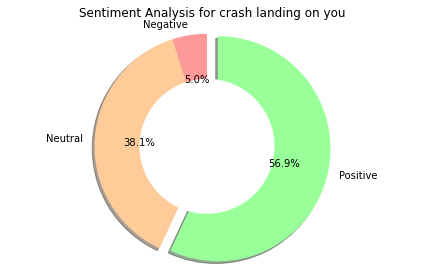

In [29]:
# Positive sentiment: compound score >= 0.05
# Neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# Negative sentiment: compound score <= -0.05
pd.set_option('display.max_colwidth', None)

df_pos = df_tweets2.loc[df_tweets1['compound'] >= 0.05,'Tweets']
df_neu = df_tweets2.loc[(df_tweets1['compound'] > -0.05) & (df_tweets2['compound'] < 0.05),'Tweets']
df_neg = df_tweets2.loc[df_tweets1['compound'] <= -0.05,'Tweets']

labels = ['Negative','Neutral','Positive']
sizes = [len(df_neg),len(df_neu),len(df_pos)]

# pie chart
# only "explode" the 3rd slice i.e. 'Positive'
explode = (0, 0, 0.1)  
colors = ['#ff9999','#ffcc99','#99ff99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode,labels=labels, colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90)

#draw center circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
ax1.set_title("Sentiment Analysis for " + entry2)

plt.tight_layout()
plt.savefig(entry2 +'.png',bbox_inches='tight')

plt.show()


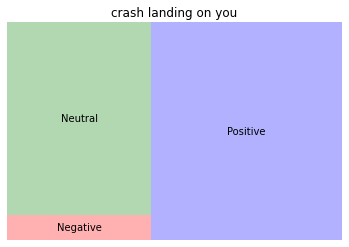

In [30]:
# squarify treemaps
squarify.plot(sizes=sizes, label=labels, color=["red","green","blue"],alpha=.3 )
plt.axis('off')
plt.title(entry2)
plt.savefig(entry2 + "_tree.png",bbox_inces='tight')
plt.show()

Text(0.5, 1.0, 'sweet home vs crash landing on you')

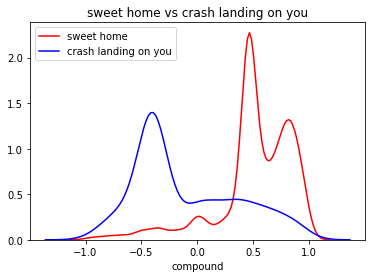

In [31]:
ax1 = sns.distplot(df_tweets1['compound'], bins=10, hist = False, label = entry1, color ='red')
ax2 = sns.distplot(df_tweets2['compound'], bins=10, hist = False, label = entry2, color ='blue')
plt.legend()
plt.savefig(entry1 + " vs " + entry2 + ".png",bbox_inces='tight')
plt.title(entry1 + " vs "+ entry2)


In [32]:
# wordclouds for the tweets

In [33]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", txt).split())

In [34]:
tweets_no_urls = [remove_url(tweet) for tweet in df_tweets1['Tweets']]
tweets_no_urls[:5]

['euphoric ggk Sweet home',
 'vou assistir sweet home',
 'EL WEBTOOM DE SWEET HOME ME ENCANTAAAA BTS twt namjoon sabe de gustos',
 'Home Sweet Home',
 'I heard joon is proud of himself for doing 20 pull ups that makes me feel so and he mentioned he liked sweet home']

In [35]:
words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]
words_in_tweet[:2]

[['euphoric', 'ggk', 'sweet', 'home'], ['vou', 'assistir', 'sweet', 'home']]

In [36]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('home', 1040),
 ('sweet', 937),
 ('i', 447),
 ('the', 233),
 ('a', 231),
 ('and', 211),
 ('to', 190),
 ('is', 174),
 ('it', 167),
 ('my', 134),
 ('of', 130),
 ('so', 125),
 ('in', 119),
 ('you', 114),
 ('watch', 104)]

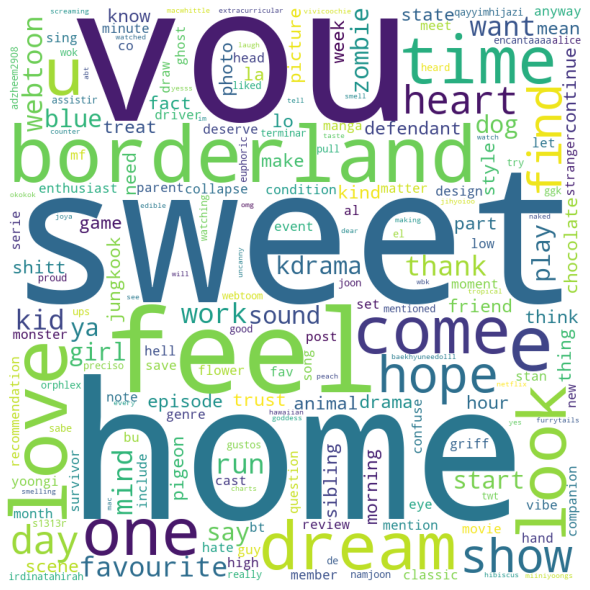

In [37]:
# remove stopwords i.e. words that do not add meaningul info to the tweet such as who, a, what, you, etc.

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
#for val in df_tweets['Tweets']: 
for val in counts_no_urls: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(
    width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
#                colormap='gist_stern',
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

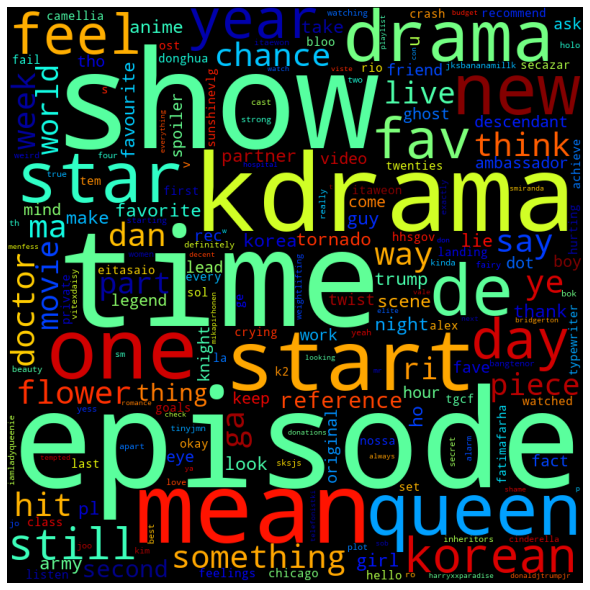

In [38]:
tweets_no_urls = [remove_url(tweet) for tweet in df_tweets2['Tweets']]
words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]

# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

# remove stopwords i.e. words that do not add meaningul info to the tweet such as who, a, what, you, etc.

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
#for val in df_tweets['Tweets']: 
for val in counts_no_urls: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords,
                colormap='jet',
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.savefig(entry2 + '_cloud.png',bbox_inches='tight')

plt.show() 

# Example for company reporting earning - sentiments before and after announcement

In [41]:
stock = input("company name of the stock: ")

company name of the stock: taiwan semiconductor


In [52]:
reportdate = input("earning reported date (yyyy-mm-dd): ")

earning reported date (yyyy-mm-dd): 2021-01-14


In [53]:
#before_reporting

In [54]:
tweets1 = tweepy.Cursor(api.search, q=stock + " -filter:retweets",lang="en").items(1000)
df_tweets1 = pd.DataFrame(data=[(tweet.text,tweet.created_at) 
                                for tweet in tweets1], columns=['Tweets','created'])
df_tweets1.head(10)

,Tweets,created
0,Taiwan Semiconductor Option Alert: Feb 19 $150 Calls Sweep (31) above Ask!: 302 @ $1.599 vs 2596 OI; Ref=$131.3\n$TSM,2021-01-19 20:41:36
1,Taiwan Semiconductor Stock Bullish By 5% So Far On Tuesday\nShares of Taiwan Semiconductor jumped 5.28% to $131.84 a… https://t.co/CQKgw58Ud0,2021-01-19 19:41:38
2,"@stratechery Re: geopolitics section, another important bit is semiconductor leadership is existential for Taiwan,… https://t.co/IAPho1SCfF",2021-01-19 18:32:43
3,"Taiwan Semiconductor Stock's Jumps 4% So Far On Tuesday, Outperforms Market\nShares of Taiwan Semiconductor rose 4.… https://t.co/nuJ9vRW0Bn",2021-01-19 18:28:07
4,"Intel plans to turn to Taiwan Semiconductor Manufacturing Co to make 7nm GPUs, according to multiple media reports.… https://t.co/wlQiiqnWlp",2021-01-19 18:15:53
5,Taiwan Semiconductor Manufacturing Co. (TSMC) has doubled its capital expenditure budget for 2021 to as much as $28… https://t.co/l5lniRJowb,2021-01-19 18:12:59
6,Midday #NYSE Top 100 Volume Leaders\n#General Motors Company ( $GM)\n#Palantir Technologies Inc Cl A ( $PLTR)\n#AT&amp;T I… https://t.co/CfXCOfZvmO,2021-01-19 17:47:25
7,#TechStuff: Better Buy: Advanced Micro Devices (AMD) vs. Taiwan Semiconductor (TSMC) - The Motley Fool\n\n#technology… https://t.co/tlDRpgZAkp,2021-01-19 17:47:22
8,"Stuck in the Middle: Taiwan's Semiconductor Industry, the US-China Tech Fight, and Cross-Strait Stability - Foreign… https://t.co/H0HCxvMPX6",2021-01-19 17:34:32
9,"Stuck in the Middle: Taiwan's Semiconductor Industry, the US-China Tech Fight, and Cross-Strait Stability - Foreign… https://t.co/XviUzFKFIy",2021-01-19 17:34:32


In [55]:
# store df to csv for future use
df_tweets1.to_csv(r'\tsm_twitter.csv', index = False)

In [56]:
df_tweets1

,Tweets,created
0,Taiwan Semiconductor Option Alert: Feb 19 $150 Calls Sweep (31) above Ask!: 302 @ $1.599 vs 2596 OI; Ref=$131.3\n$TSM,2021-01-19 20:41:36
1,Taiwan Semiconductor Stock Bullish By 5% So Far On Tuesday\nShares of Taiwan Semiconductor jumped 5.28% to $131.84 a… https://t.co/CQKgw58Ud0,2021-01-19 19:41:38
2,"@stratechery Re: geopolitics section, another important bit is semiconductor leadership is existential for Taiwan,… https://t.co/IAPho1SCfF",2021-01-19 18:32:43
3,"Taiwan Semiconductor Stock's Jumps 4% So Far On Tuesday, Outperforms Market\nShares of Taiwan Semiconductor rose 4.… https://t.co/nuJ9vRW0Bn",2021-01-19 18:28:07
4,"Intel plans to turn to Taiwan Semiconductor Manufacturing Co to make 7nm GPUs, according to multiple media reports.… https://t.co/wlQiiqnWlp",2021-01-19 18:15:53
...,...,...
306,"Taiwan SemiConductor Transient Voltage Suppressors uptill 6600W. Eg: TLD6S43AH, TLD8S10AH &amp; TLD8S15AH https://t.co/K496E4t5jv",2021-01-12 08:30:23
307,Intel Corp plans to tap Taiwan Semiconductor Manufacturing Co to make a second generation discrete graphics chip fo… https://t.co/tUGhfJoxKN,2021-01-12 08:03:02
308,"$000990 #DB HiTek ... Taiwan Semiconductor Manufacturing Company Limited - Strategy, SWOT and Corporate Finance Rep… https://t.co/9YM89MIDSj",2021-01-12 06:33:02
309,Intel Will Likely Turn to Taiwan Semiconductor for Chips. Here’s Who Benefits Most. - \n\n Intel is expected to out… https://t.co/K8xEiU6bIO,2021-01-12 03:03:15


In [57]:
df_tweets1=df_tweets1[df_tweets1['created']<reportdate]

In [58]:
analyzer1 = SentimentIntensityAnalyzer()

In [59]:
sentiment1 = df_tweets1['Tweets'].apply(lambda x: analyzer1.polarity_scores(x))

In [60]:
df_tweets1 = pd.concat([df_tweets1, sentiment1.apply(pd.Series)],1)

In [61]:
# Positive sentiment: compound score >= 0.05
# Neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# Negative sentiment: compound score <= -0.05
pd.set_option('display.max_colwidth', None)

df_pos = df_tweets1.loc[df_tweets1['compound'] >= 0.05,'Tweets']
df_neu = df_tweets1.loc[(df_tweets1['compound'] > -0.05) & (df_tweets1['compound'] < 0.05),'Tweets']
df_neg = df_tweets1.loc[df_tweets1['compound'] <= -0.05,'Tweets']

In [62]:
labels = ['Negative','Neutral','Positive']
sizes = [len(df_neg),len(df_neu),len(df_pos)]

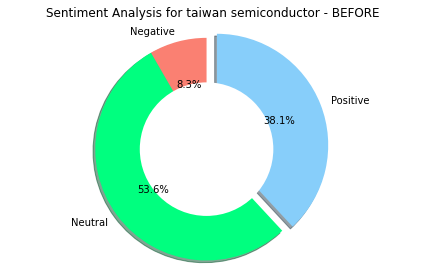

In [63]:
# pie chart
# only "explode" the 3rd slice i.e. 'Positive'
explode = (0, 0, 0.1)  
colors = ["salmon","springgreen","lightskyblue"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode,labels=labels, colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90)

#draw center circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
ax1.set_title("Sentiment Analysis for " + stock + " - BEFORE")

plt.tight_layout()
plt.savefig(stock + "_before.png",bbox_inces='tight')
plt.show()


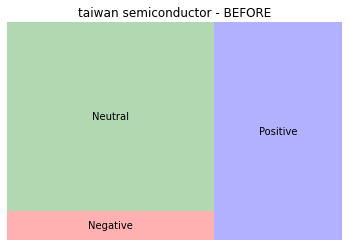

In [64]:
# squarify treemaps
squarify.plot(sizes=sizes, label=labels, color=["red","green","blue"],alpha=.3 )
plt.axis('off')
plt.title(stock + " - BEFORE")
plt.savefig(stock + "before_tree.png",bbox_inces='tight')
plt.show()

In [65]:
tweets2 = tweepy.Cursor(api.search, q=stock + " -filter:retweets",lang="en",since=reportdate).items(1000)

In [66]:
# dataframe
df_tweets2 = pd.DataFrame(data=[(tweet.text,tweet.created_at) 
                                for tweet in tweets2], columns=['Tweets','created'])
df_tweets2.head(10)

,Tweets,created
0,Taiwan Semiconductor Option Alert: Feb 19 $150 Calls Sweep (31) above Ask!: 302 @ $1.599 vs 2596 OI; Ref=$131.3\n$TSM,2021-01-19 20:41:36
1,Taiwan Semiconductor Stock Bullish By 5% So Far On Tuesday\nShares of Taiwan Semiconductor jumped 5.28% to $131.84 a… https://t.co/CQKgw58Ud0,2021-01-19 19:41:38
2,"@stratechery Re: geopolitics section, another important bit is semiconductor leadership is existential for Taiwan,… https://t.co/IAPho1SCfF",2021-01-19 18:32:43
3,"Taiwan Semiconductor Stock's Jumps 4% So Far On Tuesday, Outperforms Market\nShares of Taiwan Semiconductor rose 4.… https://t.co/nuJ9vRW0Bn",2021-01-19 18:28:07
4,"Intel plans to turn to Taiwan Semiconductor Manufacturing Co to make 7nm GPUs, according to multiple media reports.… https://t.co/wlQiiqnWlp",2021-01-19 18:15:53
5,Taiwan Semiconductor Manufacturing Co. (TSMC) has doubled its capital expenditure budget for 2021 to as much as $28… https://t.co/l5lniRJowb,2021-01-19 18:12:59
6,Midday #NYSE Top 100 Volume Leaders\n#General Motors Company ( $GM)\n#Palantir Technologies Inc Cl A ( $PLTR)\n#AT&amp;T I… https://t.co/CfXCOfZvmO,2021-01-19 17:47:25
7,#TechStuff: Better Buy: Advanced Micro Devices (AMD) vs. Taiwan Semiconductor (TSMC) - The Motley Fool\n\n#technology… https://t.co/tlDRpgZAkp,2021-01-19 17:47:22
8,"Stuck in the Middle: Taiwan's Semiconductor Industry, the US-China Tech Fight, and Cross-Strait Stability - Foreign… https://t.co/H0HCxvMPX6",2021-01-19 17:34:32
9,"Stuck in the Middle: Taiwan's Semiconductor Industry, the US-China Tech Fight, and Cross-Strait Stability - Foreign… https://t.co/XviUzFKFIy",2021-01-19 17:34:32


In [67]:
analyzer2 = SentimentIntensityAnalyzer()

In [68]:
sentiment2 = df_tweets2['Tweets'].apply(lambda x: analyzer2.polarity_scores(x))

In [69]:
df_tweets2 = pd.concat([df_tweets2, sentiment2.apply(pd.Series)],1)

In [70]:
# Positive sentiment: compound score >= 0.05
# Neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# Negative sentiment: compound score <= -0.05
pd.set_option('display.max_colwidth', None)

df_pos = df_tweets2.loc[df_tweets2['compound'] >= 0.05,'Tweets']
df_neu = df_tweets2.loc[(df_tweets2['compound'] > -0.05) & (df_tweets2['compound'] < 0.05),'Tweets']
df_neg = df_tweets2.loc[df_tweets2['compound'] <= -0.05,'Tweets']

In [71]:
labels = ['Negative','Neutral','Positive']
sizes = [len(df_neg),len(df_neu),len(df_pos)]

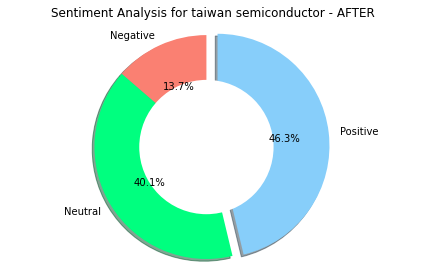

In [72]:
# pie chart
# only "explode" the 3rd slice i.e. 'Positive'
explode = (0, 0, 0.1)  
colors = ["salmon","springgreen","lightskyblue"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode,labels=labels, colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90)

#draw center circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
ax1.set_title("Sentiment Analysis for " + stock + " - AFTER")

plt.tight_layout()
plt.savefig(stock + "_after.png",bbox_inces='tight')
plt.show()


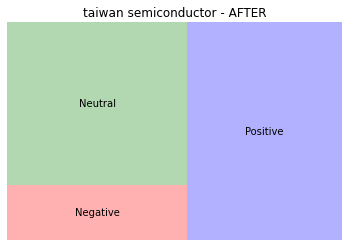

In [73]:
# squarify treemaps
squarify.plot(sizes=sizes, label=labels, color=["red","green","blue"],alpha=.3 )
plt.axis('off')
plt.title(stock + " - AFTER")
plt.savefig(stock + "_after_tree.png",bbox_inces='tight')
plt.show()